#  Applications Rating Analysis
**Data cleaning, merging, and applicant rating calculation using Python and Pandas**

### Author: Svitlana Prasolova

# Project Description
This project focuses on analyzing application data from two CSV files — `applications.csv` and `industries.csv`.  
The goal is to **clean and enrich the data, calculate individual application ratings, and determine the average
weekly rating of accepted applications**.

## Project Task:
Develop a Python-based data analysis workflow to calculate and visualize application ratings.
- The project involves cleaning and merging datasets, 
- applying rating rules to each applicant,
- filtering accepted applications,
- and analyzing average weekly ratings

## Results
- Cleaned and enriched applicant data.
- Automated the rating calculation logic based on multiple business rules.
- Calculated average weekly ratings for accepted applications.

# Process
### Preparing work environment
I will be using Python for the data transformation and research. The following libraries are installed:

In [1]:
import pandas as pd
import numpy as np

df_applicant = pd.read_csv(r"C:\Users\Світлана\Downloads\applications(2.0).csv")
df_camp = pd.read_csv(r"C:\Users\Світлана\Downloads\industries(2.0).csv")

df_applicant.head()                                   # Verifying the data (1)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3


#### 1. Preparing data for analysis (removing duplicates and filling in empty NaN values)

In [3]:
print(df_applicant['applicant_id'].count())         # determining the presence of duplicates
print(df_applicant['applicant_id'].nunique())

13315
13278


In [4]:
df_applicant = df_applicant.drop_duplicates(subset='applicant_id', keep='last')   # removing duplicates

In [5]:
print(df_applicant['applicant_id'].count())         # verification
print(df_applicant['applicant_id'].nunique())

13278
13278


In [6]:
df_applicant.isnull().sum()                          # Determining the number of missing values

Applied at            0
Amount               33
Age                   0
Gender                0
Industry              0
Marital status        0
External Rating      72
Education level      33
Location           1773
applicant_id          0
dtype: int64

In [7]:
df_applicant["External Rating"] = df_applicant["External Rating"].fillna(0)         # In the External Rating column, replace empty values with zeros

In [8]:
df_applicant["Education level"] = df_applicant["Education level"].fillna("Середня") # In the Education level column, replace empty values with "Average"

In [9]:
df_applicant.isnull().sum()                                                 # verification

Applied at            0
Amount               33
Age                   0
Gender                0
Industry              0
Marital status        0
External Rating       0
Education level       0
Location           1773
applicant_id          0
dtype: int64

#### 2. Add data from the industries.csv file, namely industry ratings (Score), to the DataFrame df_applicant

In [10]:
df_merge = pd.merge(df_applicant, df_camp, on = 'Industry', how='left')
df_merge.head()                                                # Verifying the data (2)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20
1,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10
2,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15
3,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15
4,11.30.2022 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15


#### 3. Calculate the rating of the application according to the specified conditions

1. If the applicant's age is between 35 and 55, 20 points are added to the rating
2. If the application was submitted on a non-weekend, 20 points are added to the rating
3. If the applicant is married, 20 points are added to the rating
4. If the applicant is located in Kyiv or the region, 10 points are added to the rating
5. The 'Score' value from the industries.csv table is also added to the application (and ranges from 0 to 20 points)
6. If the 'External Rating' is greater than or equal to 7, 20 points are added to the rating
7. If the 'External Rating' is less than or equal to 2, 20 points are subtracted from the rating

In [11]:
if_1 = ((df_merge.Age >=35) & (df_merge.Age <= 55)) * 20      # Taking into account the first rating condition

In [12]:
df_merge['Applied at'].sample(3)

4964     12.05.2022 23:39
7964     12.12.2022 11:41
12656    01.03.2023 14:15
Name: Applied at, dtype: object

In [13]:
df_merge['Applied at'] = pd.to_datetime(df_merge['Applied at'], format='mixed') #Converting the Applied at column to datetime format and checking the correctness of the date conversion 
df_merge['Applied at'].sample(3)

2530    2022-12-01 11:08:00
13073   2023-01-06 08:40:00
3681    2022-12-03 15:58:00
Name: Applied at, dtype: datetime64[ns]

In [14]:
df_merge['Applied at'].dt.weekday                 # Determining the week number for each date

0        2
1        2
2        2
3        2
4        2
        ..
13273    0
13274    0
13275    0
13276    0
13277    0
Name: Applied at, Length: 13278, dtype: int32

In [15]:
df_merge['Applied at'].dt.day_name()                  #Determining the name of the day of the week for each date

0        Wednesday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
13273       Monday
13274       Monday
13275       Monday
13276       Monday
13277       Monday
Name: Applied at, Length: 13278, dtype: object

In [16]:
if_2 = (df_merge['Applied at'].dt.weekday < 5) * 20              # Considering the second and subsequent ranking conditions

In [17]:
if_3 = (df_merge['Marital status'] == 'Married') * 20

In [18]:
if_4 = df_merge['Location'].str.contains('Київ чи область', na=False) * 10

In [19]:
if_5 = df_merge.Score.fillna(0)

In [20]:
if_6_1 = (df_merge['External Rating'] >= 7) * 20
if_6_2 = (df_merge['External Rating'] <= 2) * -20

In [21]:
df_merge['Rating'] = if_1 + if_2 + if_3 + if_4 + if_5 + if_6_1 + if_6_2
df_merge.head()                                                       # Intermediate resulting rating

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating
0,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,60
1,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,40
2,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,15
3,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,35
4,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,65


In [22]:
mask_zero = (
    df_merge['Amount'].isna() |
    df_merge['External Rating'].isna() |
    (df_merge['External Rating'] == 0)
)

df_merge.loc[mask_zero, 'Rating'] = 0                      # Reset the rating if there is no Amount or External Rating == 0

In [23]:
df_merge.head()                                            # Resulting rating

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating
0,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,0
1,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,40
2,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,0
3,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,35
4,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,65


In [24]:
df_merge.shape                       # Preliminary checking the number of rows and columns

(13278, 12)

#### 4. In the resulting table, leave only applications with a rating greater than zero, these applications will be considered accepted

In [25]:
df_merge = df_merge[(df_merge['Rating'] > 0) & (df_merge['Rating'] <= 100)]  # Limiting the rating to a number from 0 to 100
df_merge.shape

(12443, 12)

In [26]:
df_merge.head()                                                              # Final rating

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating
1,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,40
3,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,35
4,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,65
5,2022-11-30 10:27:42,4200.0,30,Чоловік,Media,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,0aaf59fb3ef90f50ccd4800312e5c271,5,35
6,2022-11-30 10:27:44,3600.0,24,Чоловік,E-commerce,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,aa54d6e672e4233febadbafdfd048327,15,35


In [27]:
df_merge.tail(3)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating
13275,2023-01-09 11:19:00,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7,0,40
13276,2023-01-09 11:28:00,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726,15,55
13277,2023-01-09 11:38:00,12600.0,32,Чоловік,High Load Systems,Married,11.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,a36a922c50b554cad6cd0eb98a5eaad8,15,75


#### 5. Group the data from the resulting table by the week of application submission, and display the average rating of accepted applications in each week.


In [28]:
iso_calendar = df_merge['Applied at'].dt.isocalendar()
df_merge['Year week'] = iso_calendar['year'].astype(str) + '_' + iso_calendar['week'].astype(str).str.zfill(2)
df_merge.head(3)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating,Year week
1,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,40,2022_48
3,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,35,2022_48
4,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,65,2022_48


In [29]:
grouped_week = df_merge.groupby('Year week')['Rating'].mean().sort_index()  # Grouping data by week of application and outputting the average rating
grouped_week

Year week
2022_48    50.097187
2022_49    49.021440
2022_50    49.387611
2022_51    46.512172
2022_52    50.581312
2023_01    50.804249
2023_02    51.875000
Name: Rating, dtype: float64

In [30]:
import seaborn as sns                             # loading the seaborn library for data visualization

In [31]:
sns.set_theme()

<Axes: xlabel='Year week'>

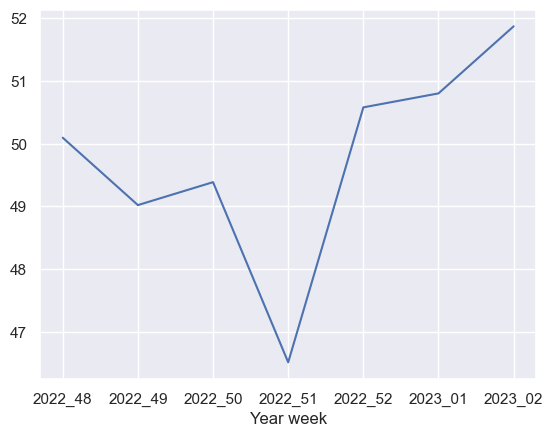

In [32]:
sns.lineplot(x=grouped_week.index, y=grouped_week.values)    # visualization of the obtained results